# Tutorial 39: Mean Semi Kurtosis Optimization

## 1. Downloading the data:

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import warnings

warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.4%}'.format

# Date range
start = '2016-01-01'
end = '2019-12-30'

# Tickers of assets
assets = ['JCI', 'AMZN', 'CMCSA', 'CPB', 'MO', 'APA', 'MMC', 'JPM',
          'ZION', 'AAPL', 'BAX', 'BMY', 'LUV', 'PCAR', 'TXT', 'TMO',
          'DE', 'MSFT', 'HPQ', 'SEE', 'VZ', 'CNP', 'NI', 'T', 'BA']
assets.sort()

# Downloading data
data = yf.download(assets, start = start, end = end)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = assets

[*********************100%%**********************]  25 of 25 completed


In [2]:
# Calculating returns

Y = data[assets].iloc[-300:,:].pct_change().dropna()

display(Y.head())

,AAPL,AMZN,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,...,MO,MSFT,NI,PCAR,SEE,T,TMO,TXT,VZ,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2018-10-19,1.5230%,-0.3778%,0.0475%,-0.8599%,-1.4332%,-3.0011%,0.1113%,1.2968%,3.4361%,-0.8764%,...,1.6740%,0.1475%,0.6339%,-0.1823%,-0.7728%,1.1384%,-1.1145%,-1.2872%,0.4575%,-0.8025%
2018-10-22,0.6110%,1.4325%,-1.9240%,-0.0786%,-0.6335%,-6.2984%,-0.6392%,-1.1024%,0.0527%,-0.3221%,...,-1.0331%,0.8927%,-0.8661%,0.4483%,-2.8972%,-0.6085%,-0.6075%,-0.8634%,0.1457%,-3.4490%
2018-10-23,0.9426%,-1.1513%,-3.6571%,-1.6658%,-0.4202%,-0.4520%,-0.2798%,-0.5034%,0.1845%,-3.9948%,...,0.8808%,-1.3956%,0.4766%,-5.1239%,-0.0321%,1.0713%,-1.0807%,-1.8308%,4.0560%,4.0353%
2018-10-24,-3.4302%,-5.9083%,-4.5500%,1.3141%,-1.8042%,-3.5933%,-4.2917%,0.8673%,0.9995%,-4.1109%,...,0.7437%,-5.3469%,3.5178%,-4.2683%,-1.3479%,-8.0557%,-1.2403%,-4.2187%,0.3671%,-3.3065%
2018-10-25,2.1898%,7.0887%,0.4741%,2.5716%,0.5186%,0.7782%,5.0410%,-0.5733%,-1.1719%,2.1585%,...,1.3642%,5.8444%,-1.0309%,0.4914%,0.9109%,-1.2517%,4.3662%,1.3800%,-1.7241%,3.3538%


## 2. Estimating Mean Semi Kurtosis Portfolios

### Semi Kurtosis Portfolio Model 설명

**Semi Kurtosis Portfolio Model**은 포트폴리오 수익률의 비대칭성과 꼬리 리스크를 더 잘 반영하기 위해 전통적인 첨도(Kurtosis) 대신 Semi Kurtosis를 사용하는 포트폴리오 최적화 방법입니다. 이 모델은 투자자의 리스크 관리에 있어 극단적 손실에 더 민감하게 대응할 수 있도록 합니다.

### Semi Kurtosis란?

- **Semi Kurtosis**는 분포의 하위 꼬리 부분에 집중하여, 분포의 비대칭성을 더 잘 반영합니다.
- 전통적인 Kurtosis는 분포의 모든 부분을 고려하지만, Semi Kurtosis는 하위 꼬리만을 고려하여 극단적 손실에 대한 민감도를 높입니다.

### Semi Kurtosis를 사용한 포트폴리오 최적화

Semi Kurtosis 포트폴리오 최적화는 다음과 같은 형태를 취합니다:

1. **목표 함수 (Objective Function)**:
   $$ \min_w \, \text{Semi Kurtosis}(w) $$
   여기서 $ w $는 포트폴리오 가중치 벡터입니다.

2. **제약 조건 (Constraints)**:
   - 가중치의 합은 1이어야 합니다:
     $$ \sum_{i=1}^{n} w_i = 1 $$
   - 각 자산의 가중치는 특정 범위 내에 있어야 합니다:
     $$ l_i \leq w_i \leq u_i $$

### 예제 코드

아래는 `Riskfolio-Lib`를 사용하여 Semi Kurtosis 포트폴리오를 최적화하는 예제 코드입니다:

```python
import numpy as np
import pandas as pd
import riskfolio as rp
import matplotlib.pyplot as plt

# 예시 데이터 생성
np.random.seed(42)
Y = np.random.randn(100, 10)  # 100개의 샘플과 10개의 자산
asset_names = [f'Asset {i}' for i in range(1, 11)]
returns = pd.DataFrame(Y, columns=asset_names)

# 포트폴리오 객체 생성
port = rp.Portfolio(returns=returns)

# 기대 수익률, 공분산 행렬 및 Semi Kurtosis 행렬 추정
method_mu = 'hist'
method_cov = 'hist'
method_semi_kurt = 'hist'  # 역사적 데이터를 사용하여 Semi Kurtosis 행렬 추정
port.assets_stats(method_mu=method_mu, method_cov=method_cov, method_kurt=method_semi_kurt)

# MOSEK 솔버 설정
port.solvers = ['MOSEK']

# 최적화 매개변수 설정
model = 'Classic'
rm = 'Semi-Kurtosis'  # 리스크 측정치로 Semi Kurtosis 사용
obj = 'Sharpe'
hist = True
rf = 0
l = 0

# 최적 포트폴리오 계산
w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

# 히스토그램 플롯
ax = rp.plot_hist(returns=Y, w=w, alpha=0.05, bins=50, height=6, width=10, ax=None)

# 플롯 표시
plt.show()
```

### 코드 설명

1. **데이터 준비 및 포트폴리오 객체 생성**:
   ```python
   np.random.seed(42)
   Y = np.random.randn(100, 10)
   asset_names = [f'Asset {i}' for i in range(1, 11)]
   returns = pd.DataFrame(Y, columns=asset_names)
   port = rp.Portfolio(returns=returns)
   ```

   - 예시 데이터를 생성하고 자산 이름을 설정합니다.
   - `rp.Portfolio` 클래스를 사용하여 포트폴리오 객체를 생성합니다.

2. **기대 수익률, 공분산 행렬 및 Semi Kurtosis 행렬 추정**:
   ```python
   method_mu = 'hist'
   method_cov = 'hist'
   method_semi_kurt = 'hist'
   port.assets_stats(method_mu=method_mu, method_cov=method_cov, method_kurt=method_semi_kurt)
   ```

   - 역사적 데이터를 기반으로 기대 수익률, 공분산 행렬 및 Semi Kurtosis 행렬을 추정합니다.

3. **MOSEK 솔버 설정 및 최적화 매개변수 설정**:
   ```python
   port.solvers = ['MOSEK']
   model = 'Classic'
   rm = 'Semi-Kurtosis'
   obj = 'Sharpe'
   hist = True
   rf = 0
   l = 0
   ```

   - MOSEK 솔버를 사용하도록 설정하고, 최적화 매개변수를 지정합니다.

4. **최적 포트폴리오 계산**:
   ```python
   w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)
   ```

   - 지정된 매개변수에 따라 포트폴리오를 최적화합니다.

5. **히스토그램 플롯 및 표시**:
   ```python
   ax = rp.plot_hist(returns=Y, w=w, alpha=0.05, bins=50, height=6, width=10, ax=None)
   plt.show()
   ```

   - `plot_hist` 함수를 사용하여 히스토그램을 플롯하고, 최적화된 포트폴리오의 수익률 분포를 시각화합니다.

### 결론

Semi Kurtosis 포트폴리오 모델은 전통적인 Kurtosis 대신 Semi Kurtosis를 사용하여 극단적 손실에 더 민감하게 대응하는 포트폴리오 최적화를 제공합니다. 이 모델은 꼬리 리스크를 관리하고 투자자의 리스크 선호도에 맞추어 포트폴리오를 구성하는 데 유용합니다. 위 예제 코드는 Semi Kurtosis 포트폴리오를 최적화하는 방법을 보여주며, 다양한 투자 전략을 검토하고 실행하는 데 도움이 됩니다.

Cajas(2022)가 제안한 Semi Kurtosis 포트폴리오 모델은 포트폴리오 수익률의 네 번째 하위 모멘트를 하위 세미 cokurtosis 행렬을 사용하여 최적화하는 방법을 보여줍니다. 이는 하위 세미 공분산 행렬을 사용하는 것과 유사한 방식입니다.

이 모델은 준정합 프로그래밍(semidefinite programming)을 사용하기 때문에 많은 수의 자산을 최적화할 때는 MOSEK를 사용하는 것이 좋습니다. 또한, 많은 수의 자산을 다룰 때는 이 모델의 이완된 버전(relaxed version)을 사용하는 것이 권장됩니다. 이 이완된 버전은 2차원 원뿔 프로그래밍(second order cone programming)을 기반으로 합니다. 이완된 버전을 사용하려면 자산의 수가 속성 `n_max_kurt`보다 많아야 합니다. 예를 들어, 자산의 수가 30이고 `port.n_max_kurt = 25`로 설정하면, Riskfolio-lib는 이완된 버전을 사용할 것입니다.

MOSEK를 설치하는 방법은 이 링크에서 확인할 수 있으며, Anaconda를 사용하는 것이 좋습니다. 또한, 학술용 라이선스를 요청하는 것이 좋습니다.

- [MOSEK 설치 지침](https://www.mosek.com/products/academic-licenses/)

### 2.1 Calculating the portfolio that optimize return/semi kurtosis ratio.

In [3]:
import riskfolio as rp
import mosek

# Building the portfolio object
port = rp.Portfolio(returns=Y)

# Calculating optimum portfolio

# Select method and estimate input parameters:

method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.
method_kurt='hist' # Method to estimate cokurtosis square matrix based on historical data.

port.assets_stats(method_mu=method_mu,
                  method_cov=method_cov,
                  method_kurt=method_kurt,
                  )

# Estimate optimal portfolio:

port.solvers = ['MOSEK'] # It is recommended to use mosek when optimizing Semi Kurtosis

model ='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
rm = 'SKT' # Risk measure used, this time will be Tail Gini Range
obj = 'Sharpe' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
l = 0 # Risk aversion factor, only useful when obj is 'Utility'

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

You must convert self.kurt to a positive definite matrix
You must convert self.skurt to a positive definite matrix


,AAPL,AMZN,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,...,MO,MSFT,NI,PCAR,SEE,T,TMO,TXT,VZ,ZION
weights,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,2.2933%,1.5068%,0.0000%,10.1991%,0.0000%,...,0.0000%,0.0000%,0.0000%,4.7227%,5.3223%,0.0000%,5.1385%,0.0000%,27.6923%,0.0000%


### 2.2 Plotting portfolio composition

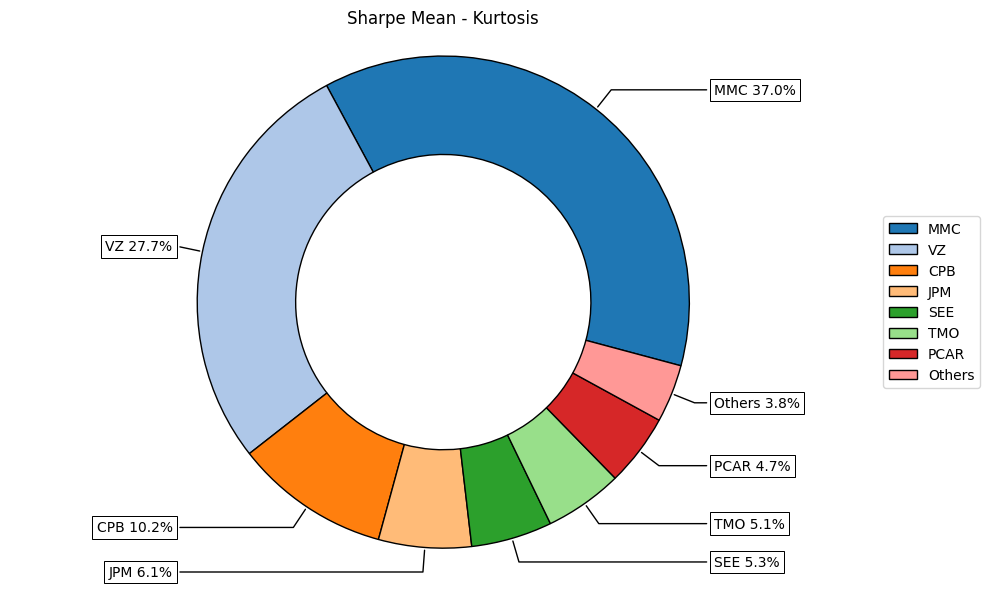

In [4]:
# Plotting the composition of the portfolio

ax = rp.plot_pie(w=w,
                 title='Sharpe Mean - Kurtosis',
                 others=0.05,
                 nrow=25,
                 cmap = "tab20",
                 height=6,
                 width=10,
                 ax=None)

### 2.3 Plotting risk measures

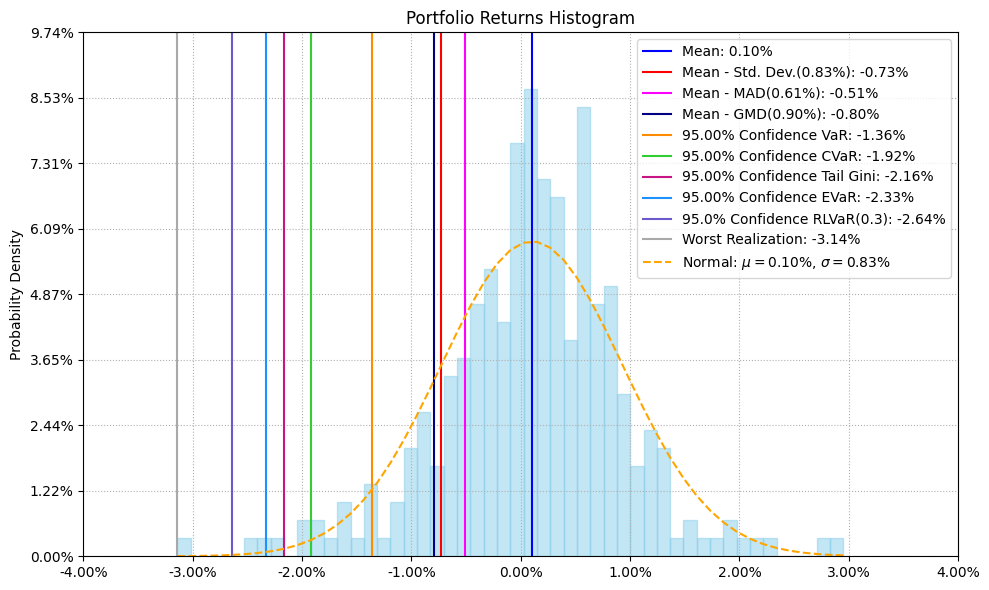

In [5]:
ax = rp.plot_hist(returns=Y,
                  w=w,
                  alpha=0.05,
                  bins=50,
                  height=6,
                  width=10,
                  ax=None)

### 2.4 Calculate efficient frontier

In [6]:
points = 50 # Number of points of the frontier

frontier = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)

display(frontier.T.head())

The problem doesn't have a solution with actual input parameters


,AAPL,AMZN,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,...,MO,MSFT,NI,PCAR,SEE,T,TMO,TXT,VZ,ZION
0,0.0000%,0.0000%,0.0000%,0.0000%,1.4623%,6.3368%,12.0102%,16.6034%,0.0000%,0.0000%,...,10.2422%,0.0000%,5.6468%,0.0000%,8.8631%,0.0000%,0.0000%,0.0000%,28.2496%,0.0000%
1,0.0000%,0.0000%,0.0000%,0.0000%,1.0661%,5.9073%,11.2327%,11.7557%,0.0000%,0.0000%,...,5.6056%,0.0000%,5.9898%,0.0000%,9.2231%,0.0000%,0.0000%,0.0000%,30.2241%,0.0000%
2,0.0000%,0.0000%,0.0000%,0.0000%,0.5685%,5.4447%,8.8896%,4.5481%,0.0819%,0.0000%,...,0.0001%,0.0000%,7.4428%,0.0000%,9.7241%,0.0000%,0.0000%,0.0000%,33.1216%,0.0000%
3,0.0000%,0.0000%,0.0000%,0.0000%,0.1878%,5.4248%,6.5310%,0.0002%,4.9113%,0.0000%,...,0.0000%,0.0000%,4.7878%,0.0000%,8.6780%,0.0000%,0.0009%,0.0000%,33.0473%,0.0000%
4,0.0000%,0.0000%,0.0000%,0.0000%,0.0001%,4.4634%,4.2342%,0.0000%,8.1200%,0.0000%,...,0.0000%,0.0000%,0.0001%,0.0000%,6.8829%,0.0000%,2.0221%,0.0000%,32.0413%,0.0000%


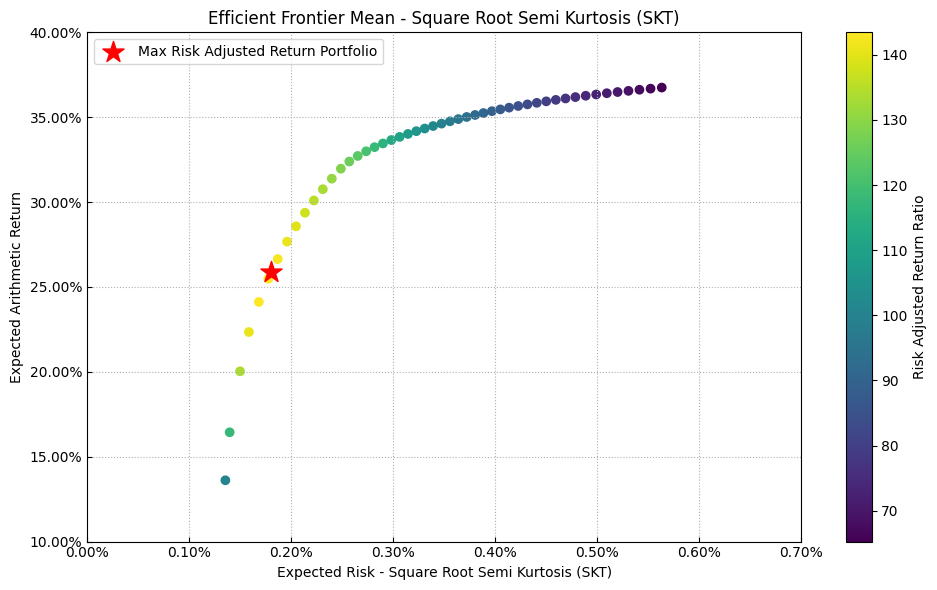

In [8]:
# Plotting the efficient frontier

label = 'Max Risk Adjusted Return Portfolio' # Title of point
mu = port.mu # Expected returns
cov = port.cov # Covariance matrix
returns = port.returns # Returns of the assets

ax = rp.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm,
                      rf=rf, alpha=0.05, cmap='viridis', w=w, label=label,
                      marker='*', s=16, c='r', height=6, width=10, ax=None)

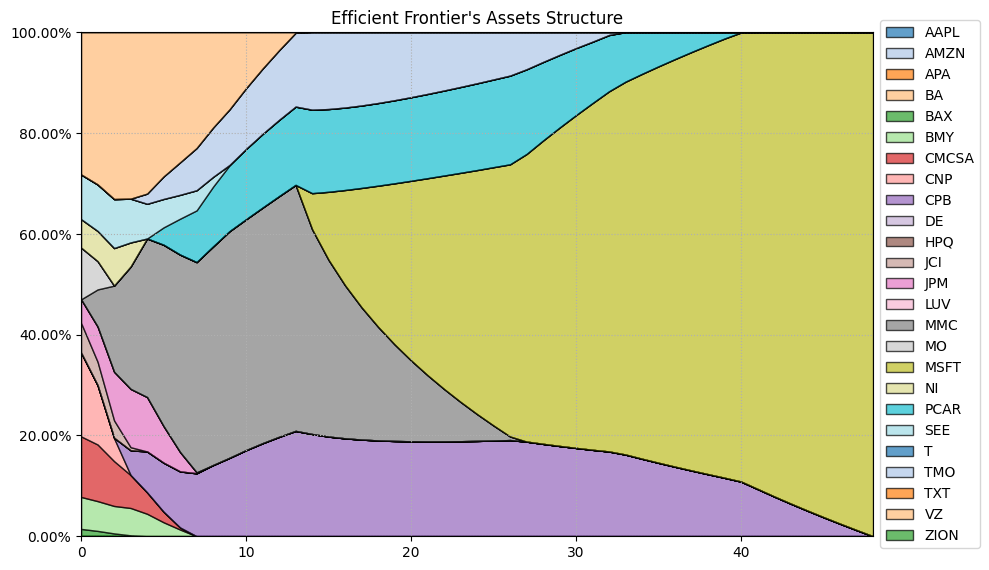

In [9]:
# Plotting efficient frontier composition

ax = rp.plot_frontier_area(w_frontier=frontier, cmap="tab20", height=6, width=10, ax=None)

## 3. Estimating Risk Parity Portfolios for Square Root Semi Kurtosis

### 3.1 Calculating the risk parity portfolio for Square Root Semi Kurtosis.

In [7]:
b = None # Risk contribution constraints vector

w_rp = port.rp_optimization(model=model, rm=rm, rf=rf, b=b, hist=hist)

display(w_rp.T)

,AAPL,AMZN,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,...,MO,MSFT,NI,PCAR,SEE,T,TMO,TXT,VZ,ZION
weights,2.5334%,2.6996%,2.4343%,3.6101%,4.2748%,4.0051%,4.0332%,6.4980%,4.6227%,2.5405%,...,5.6576%,2.9168%,5.8968%,3.4460%,4.6167%,3.9412%,3.5702%,3.2022%,7.6373%,3.4864%


### 3.2 Plotting portfolio composition

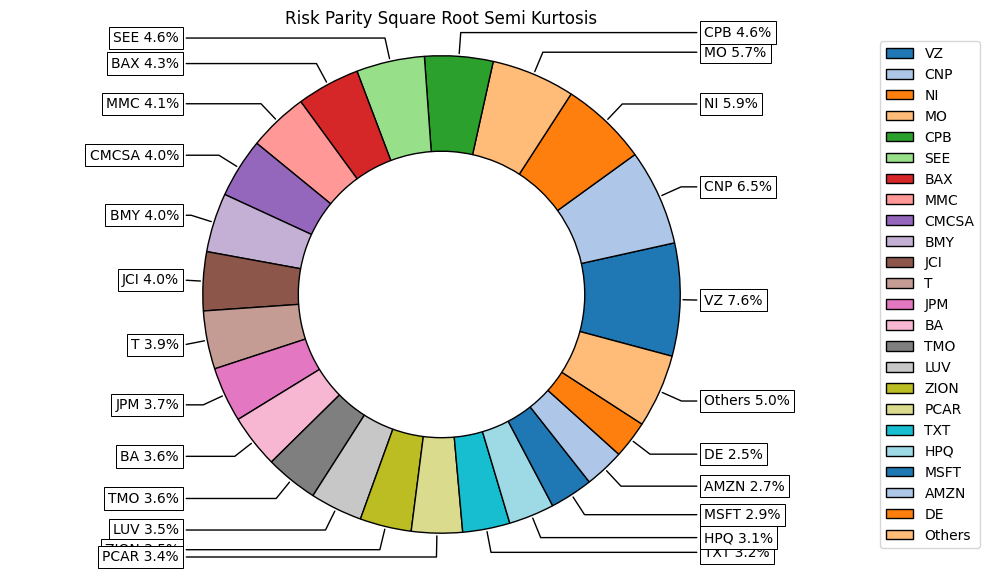

In [10]:
ax = rp.plot_pie(w=w_rp,
                 title='Risk Parity Square Root Semi Kurtosis',
                 others=0.05,
                 nrow=25,
                 cmap="tab20",
                 height=6,
                 width=10,
                 ax=None)

### 3.3 Plotting Risk Composition

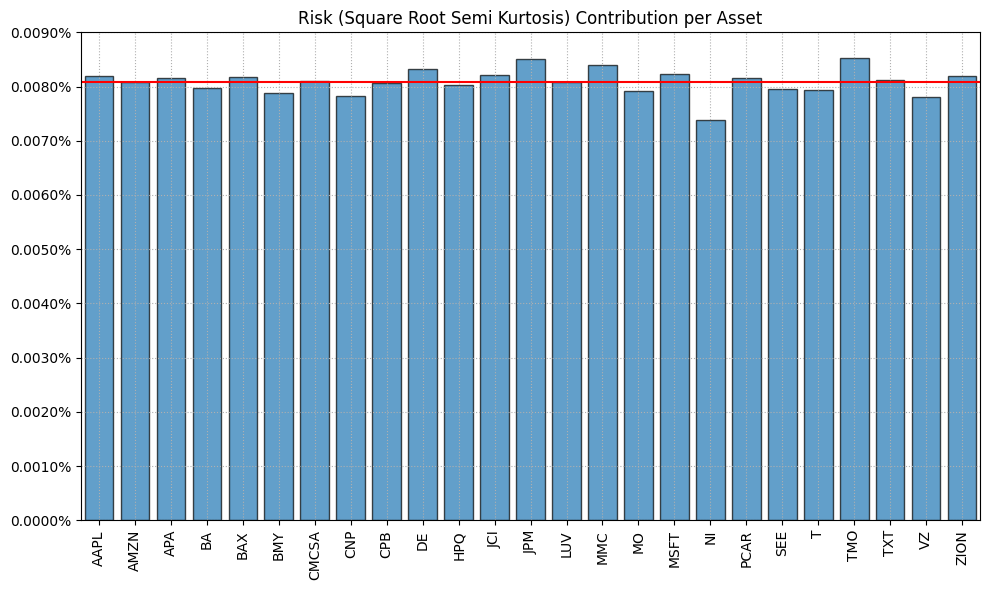

In [11]:
ax = rp.plot_risk_con(w_rp, cov=port.cov, returns=port.returns, rm=rm, rf=0, alpha=0.05,
                      color="tab:blue", height=6, width=10, ax=None)

Semi Kurtosis는 포트폴리오 하위 세미 첨도를 접근하기 위해 하위 세미 cokurtosis 행렬을 기반으로 한 휴리스틱을 사용하기 때문에, 그 해법은 단지 근사치일 뿐입니다.

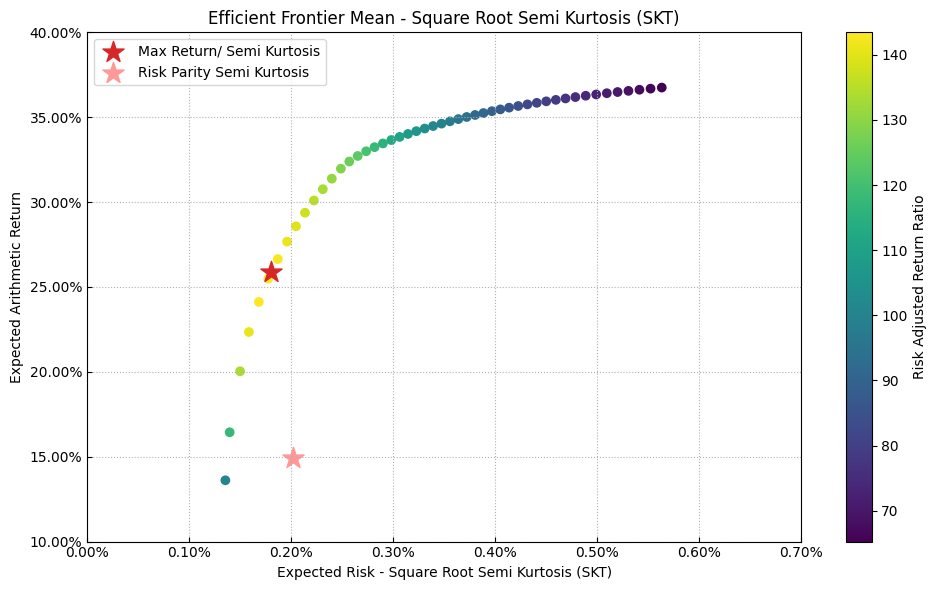

In [12]:
# Plotting the efficient frontier
ws = pd.concat([w, w_rp],axis=1)
ws.columns = ["Max Return/ Semi Kurtosis", "Risk Parity Semi Kurtosis"]

mu = port.mu # Expected returns
cov = port.cov # Covariance matrix
returns = port.returns # Returns of the assets

ax = rp.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm,
                      rf=rf, alpha=0.05, cmap='viridis', w=ws,
                      marker='*', s=16, c='r', height=6, width=10, ax=None)